In [1]:
import pandas as pd

import os

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import anndata as ad
import glob
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42


In [2]:
import json

# Load configuration
with open("../config/config_notebooks.json", "r") as config_file:
    config = json.load(config_file)


In [3]:

ARI_batch = {}



for model_type, names, benchmark_path in zip([config['retrained_model_list1_type'],
                              config['retrained_model_list2_type']],
                              [config['retrained_model_list1'],
                                config['retrained_model_list2']],
                                [config['retrained_benchmark_folder1'],
                                config['retrained_benchmark_folder2']]):

        
        
    path_to_invasive_cancer_clustering_results = os.path.join(benchmark_path, "invasive_cancer_clustering")
    ARI_batch[model_type] = {}
    
    
    opti_clusters = pd.read_csv(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], "optimal_clusters.csv"), index_col=0)
    dfs = []


    for name in names:
        
        label_file = glob.glob(os.path.join(path_to_invasive_cancer_clustering_results, config['invasive_cancer_clustering_algo'], name, f"invasive_labels_{opti_clusters.loc[name, 'n_clusters']}_clusters_umap_min_dist_*_n_neighbors_*.csv"))[0]
        print(label_file)
        
        labels = pd.read_csv(label_file, index_col=0)
        labels['tumor'] = [idx.split("_")[0] for idx in labels.index]
        
        ARI_batch[model_type][name] = adjusted_rand_score(labels['tumor'], labels['predicted_label'])
            
           

../results/benchmark/her2_final_without_A/uni_explora_models/invasive_cancer_clustering/kmeans/uni/invasive_labels_7_clusters_umap_min_dist_0.001_n_neighbors_10.csv
../results/benchmark/her2_final_without_A/uni_explora_models/invasive_cancer_clustering/kmeans/uni_explora_kde_4096_prototypes/invasive_labels_9_clusters_umap_min_dist_0.001_n_neighbors_10.csv
../results/benchmark/her2_final_without_A/uni_explora_models/invasive_cancer_clustering/kmeans/uni_explora_kde_16384_prototypes/invasive_labels_8_clusters_umap_min_dist_0.001_n_neighbors_10.csv
../results/benchmark/her2_final_without_A/uni_explora_models/invasive_cancer_clustering/kmeans/uni_explora_kde_65536_prototypes/invasive_labels_9_clusters_umap_min_dist_0.001_n_neighbors_100.csv
../results/benchmark/her2_final_without_A/uni_explora_models/invasive_cancer_clustering/kmeans/uni_explora_koleo_4096_prototypes/invasive_labels_8_clusters_umap_min_dist_0.001_n_neighbors_100.csv
../results/benchmark/her2_final_without_A/uni_explora_mod

In [4]:
df_explora = pd.DataFrame(ARI_batch[config['retrained_model_list1_type']], index=["ARI"]).T
df_explora['batch effect'] = 1 - df_explora['ARI']
df_explora['model'] = config['retrained_model_list1_type']

df_full = pd.DataFrame(ARI_batch[config['retrained_model_list2_type']], index=["ARI"]).T
df_full['batch effect'] = 1 - df_full['ARI']
df_full['model'] = config['retrained_model_list2_type']

df_batch = pd.concat([df_explora, df_full])
df_batch


,ARI,batch effect,model
uni,0.434713,0.565287,explora
uni_explora_kde_4096_prototypes,0.459828,0.540172,explora
uni_explora_kde_16384_prototypes,0.531689,0.468311,explora
uni_explora_kde_65536_prototypes,0.373745,0.626255,explora
uni_explora_koleo_4096_prototypes,0.387794,0.612206,explora
uni_explora_koleo_16384_prototypes,0.540090,0.459910,explora
uni_explora_koleo_65536_prototypes,0.491664,0.508336,explora
uni,0.434713,0.565287,full
uni_full_kde_4096_prototypes,0.235283,0.764717,full
uni_full_kde_16384_prototypes,0.318545,0.681455,full


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'uni'),
  Text(1, 0, 'uni_explora_kde_4096_prototypes'),
  Text(2, 0, 'uni_explora_kde_16384_prototypes'),
  Text(3, 0, 'uni_explora_kde_65536_prototypes'),
  Text(4, 0, 'uni_explora_koleo_4096_prototypes'),
  Text(5, 0, 'uni_explora_koleo_16384_prototypes'),
  Text(6, 0, 'uni_explora_koleo_65536_prototypes'),
  Text(7, 0, 'uni_full_kde_4096_prototypes'),
  Text(8, 0, 'uni_full_kde_16384_prototypes'),
  Text(9, 0, 'uni_full_kde_65536_prototypes'),
  Text(10, 0, 'uni_full_koleo_4096_prototypes'),
  Text(11, 0, 'uni_full_koleo_16384_prototypes'),
  Text(12, 0, 'uni_full_koleo_65536_prototypes')])

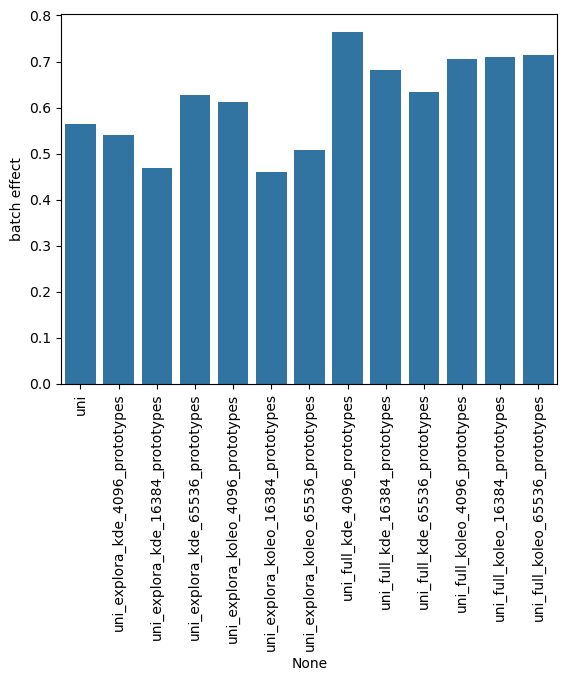

In [5]:
sns.barplot(df_batch, 
            x=df_batch.index, 
            y="batch effect")
plt.xticks(rotation=90)

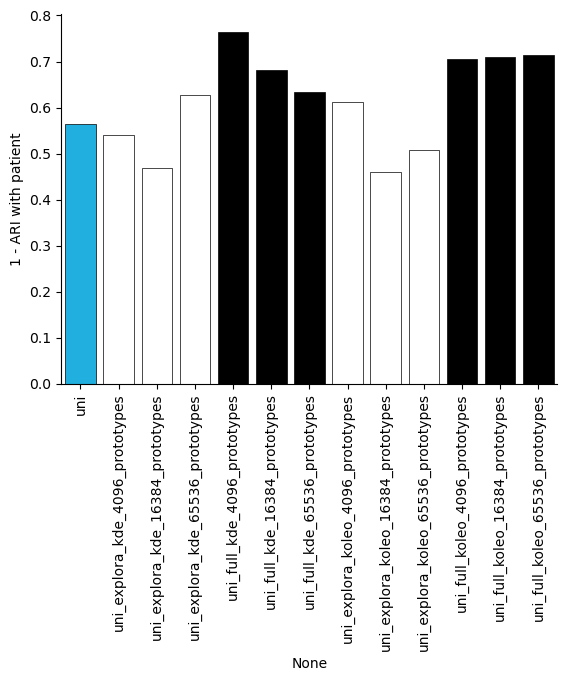

In [6]:
### For vizualisation 



df_batch = df_batch.loc[["uni",
              "uni_explora_kde_4096_prototypes",
              "uni_explora_kde_16384_prototypes",
                "uni_explora_kde_65536_prototypes",
                "uni_full_kde_4096_prototypes",
                "uni_full_kde_16384_prototypes",
                "uni_full_kde_65536_prototypes",
                "uni_explora_koleo_4096_prototypes",
                "uni_explora_koleo_16384_prototypes",
                "uni_explora_koleo_65536_prototypes",
                "uni_full_koleo_4096_prototypes",
                "uni_full_koleo_16384_prototypes",
                "uni_full_koleo_65536_prototypes"]].drop_duplicates("ARI")

sns.barplot(df_batch, 
            x=df_batch.index, 
            y="batch effect", 
            palette=["deepskyblue", "white", "white", "white", "black", "black", "black", "white", "white", "white", "black", "black", "black" ], 
            linewidth=0.5,
            edgecolor="black",
            )
plt.ylabel("1 - ARI with patient")
plt.xticks(rotation=90)
sns.despine()